Created By: Nitesh Nepal
USN: 21BTRCD061

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("Student_Marks.csv")
display(df.head())

target = 'Marks'

features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


The Dataset consists of 3 features & 100 samples.


In [3]:
features

['number_courses', 'time_study']

In [4]:
df.shape

(100, 3)

In [5]:
df.shape[1]

3

In [6]:

#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('The Dataset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


#In this we find the shape of the "number_courses","time_study" and checked if the unique value is less than 16 or not.
#if the unique value is less than 16 we consider that as categorical variable for now.

The Dataset has 1 numerical & 1 categorical features.


In [7]:
 features

['number_courses', 'time_study']

## Data Exploration

In [8]:
#shape of the dataset.
df.shape

(100, 3)

In [9]:
#finding the description of each feature.
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [10]:
#check if there is any null value or not
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [11]:
#checking the types of feature.
df.dtypes

number_courses      int64
time_study        float64
Marks             float64
dtype: object

In [12]:
#finding the total number of unique values in each feature and sorting it .
df.nunique().sort_values()

number_courses      6
time_study        100
Marks             100
dtype: int64

## Exploratory Data Analysis

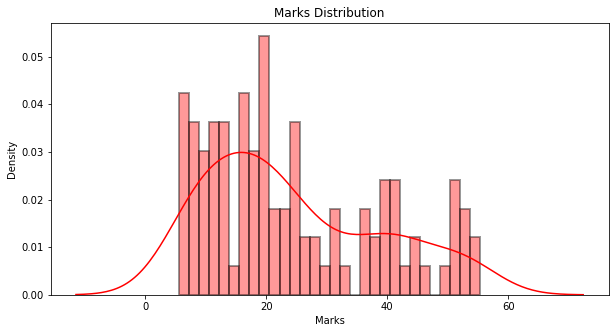

In [13]:
import warnings 
warnings.filterwarnings('ignore')

#Let us first analyze the distribution of the target variable which is "marks".
plt.figure(figsize=[10,5])
sns.distplot(df["Marks"], color='r',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Marks Distribution')
plt.show()

The target variable seems to be normally distributed.

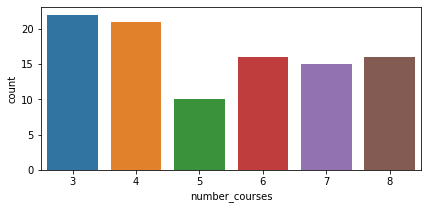

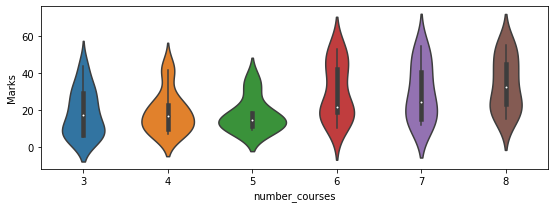

In [14]:
import math

plt.figure(figsize=[15,3])
n=2
for i in range(len(cf)):
    plt.subplot(math.ceil(len(cf)/n),n,i+1)
    sns.countplot(df[cf[i]])  #cf is a categorical feature.
plt.show()

plt.figure(figsize=[15,3])
for i in range(len(cf)):
    plt.subplot(math.ceil(len(cf)/n),n,i+1)
    sns.violinplot(x=df[cf[i]], y=df[target])
plt.tight_layout()
plt.show()

From above we found that there is no categorical feature in the dataset.

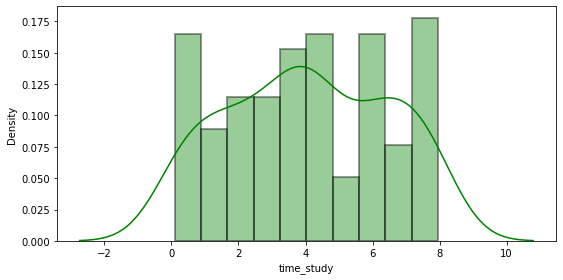

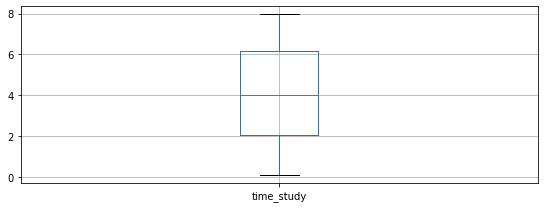

In [15]:
plt.figure(figsize=[15,4])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color="g") 
    #color="list(np.random.randint([255,255,255])/255)" we can change the colour accordingly to the numbers.
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

there seems to be some outliers in the dataset.

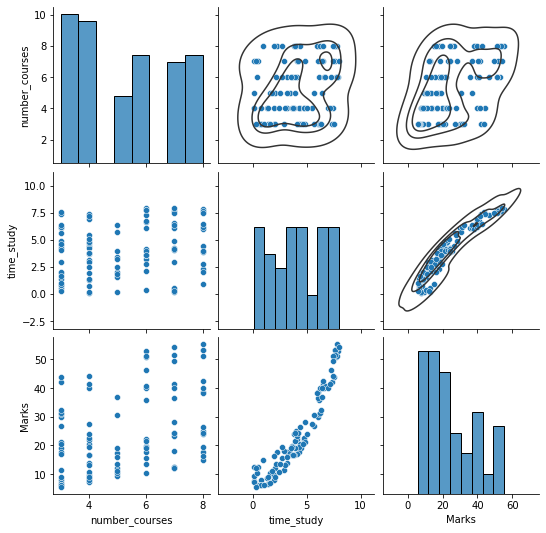

In [16]:
#finding the realtionship of all the features with each other.
g = sns.pairplot(df)
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

we can notice that some of the data have linear relation, lets analyze detailly.

## Data Preprocessing

In [17]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('The dataset doesn\'t have any duplicates')
else:
    print(' Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')

The dataset doesn't have any duplicates


In [18]:
rs  #rs is the row shape.

100

In [19]:
cs #cs is the column shape.

3

In [20]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
nvc.head()

,Total Null Values,Percentage
number_courses,0,0.0
time_study,0,0.0
Marks,0,0.0


#There doesnt exist any null values in the dataset.

In [21]:
cf

['number_courses']

In [22]:
#Converting categorical Columns to Numeric values.

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
fcc.remove('number_courses')
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("Dummy Encoding on features:")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

(100, 3)

In [23]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [24]:
df3.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [25]:
nf

['time_study']

In [26]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('Before removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


Before removal of outliers, The dataset had 100 samples.
After removal of outliers, The dataset now has 100 samples.


<AxesSubplot:ylabel='Density'>

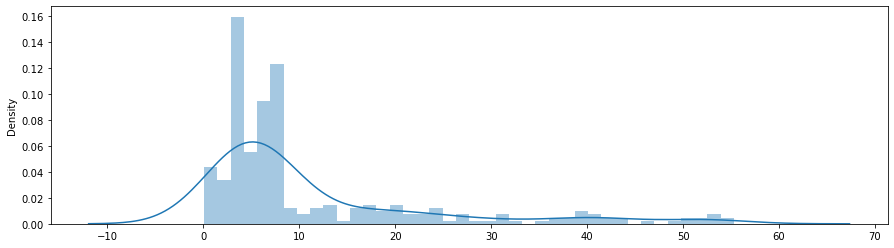

In [27]:
plt.figure(figsize=[15,4])
sns.distplot(df1,bins=40)

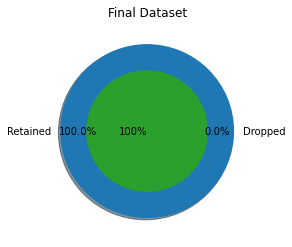

In [28]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
#df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.8, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.7)
plt.show()

## Data Manipulation

In [29]:
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,
      '\nTraining set  ---> ',Train_X.shape,Train_Y.shape,
      '\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (100, 2) (100,) 
Training set  --->  (80, 2) (80,) 
Testing set   --->  (20, 2)  (20,)


In [31]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('Standardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.head())

print('Standardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.head())

                                           Standardardization on Training set                                           


,number_courses,time_study
0,-0.684226,-1.191461
1,-0.136845,-0.372798
2,-0.684226,1.444392
3,-0.136845,-1.080178
4,-0.136845,-1.684470


                                           Standardardization on Testing set                                            


,number_courses,time_study
0,0.410535,1.389614
1,0.410535,-0.196384
2,0.957916,-1.532642
3,0.410535,-0.563877
4,-1.231606,1.501759


## Feature Selection/ Extraction

                                         Correlation Matrix                                         


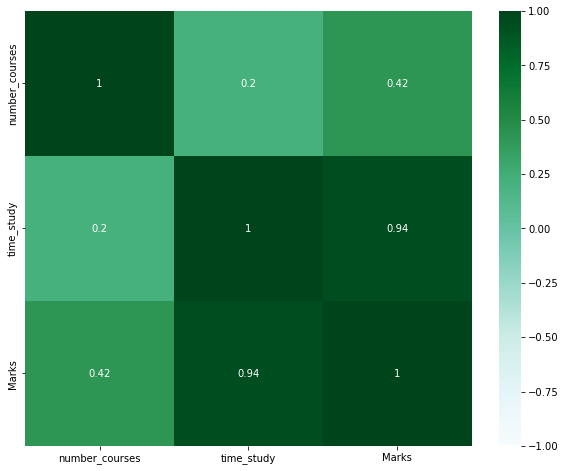

In [32]:
#Checking the correlation

print('Correlation Matrix'.center(100))
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0,cmap="BuGn")
plt.show()

There seems to be strong multi-correlation between the features. Let us try to fix these...

In [33]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     608.0
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           6.80e-48
Time:                        23:18:07   Log-Likelihood:                -213.09
No. Observations:                  80   AIC:                             432.2
Df Residuals:                      77   BIC:                             439.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         24.1342      0.396     60.995      0.000      23.346      24.922
number_courses     3.4621      0.403      8.582      0.000       2.659       4.265
time_study        12.6998      0.403     31.482      0.000      11.897      13.503
==============================================================================
Omnibus:                       15.900   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.875
Skew:                           0.574   Prob(JB):                       0.0195
Kurtosis:                       1.977   Cond. No.                         1.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Multicollinearity is a phenomenon that occurs when two or more predictor variables in a statistical model are highly correlated with each other. This can cause problems in the model, including difficulty in determining the individual effects of each variable on the outcome, instability in the model's coefficients, and reduced predictive accuracy.

In linear regression, multicollinearity can result in inflated standard errors of the regression coefficients, which can make it difficult to determine which variables are statistically significant. Multicollinearity can also cause the coefficients to change drastically when new variables are added to or removed from the model.

There are several ways to detect multicollinearity, including calculating correlation coefficients between pairs of predictor variables, examining variance inflation factors (VIFs), and conducting hypothesis tests for the coefficients. Once detected, multicollinearity can be addressed through methods such as dropping one of the correlated variables, combining the correlated variables into a single variable, or using regularization techniques such as ridge regression or lasso regression.

Dealing with multicollinearity is important in statistical modeling because it can lead to incorrect conclusions and inaccurate predictions. By addressing this issue appropriately, one can ensure that the model is both stable and accurate.

In [34]:

"""Approach: We can fix these multicollinearity with two techniques:

Manual Method - Variance Inflation Factor (VIF)
Automatic Method - Recursive Feature Elimination (RFE)

Feature Elmination using PCA Decomposition"""

'Approach: We can fix these multicollinearity with two techniques:\n\nManual Method - Variance Inflation Factor (VIF)\nAutomatic Method - Recursive Feature Elimination (RFE)\n\nFeature Elmination using PCA Decomposition'

In [35]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Manual Method- VIF


VIF stands for Variance Inflation Factor. It is a measure of multicollinearity among predictor variables within a multiple regression model. The VIF measures how much the variance of the estimated regression coefficient for a given predictor variable is increased due to collinearity with the other predictor variables in the model. A VIF value of 1 indicates that there is no multicollinearity among the predictor variables, while a VIF value greater than 1 indicates the presence of multicollinearity. In general, a VIF value greater than 5 or 10 is considered to be high and indicates that the predictor variable may be problematic for the model.

Dropped Features -->  ['number_courses']


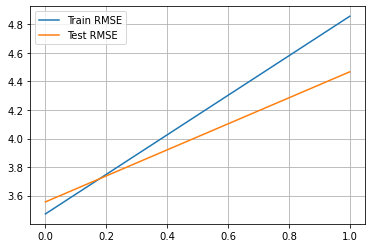

In [36]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
DROP=[];b=[]

LR = LinearRegression()
LR.fit(Train_X_std, Train_Y)

pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))

Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

for i in range(len(Train_X_std.columns)-1):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

print('Dropped Features --> ',DROP)
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

RMSE stands for Root Mean Squared Error. It is a measure of the average difference between the predicted values and the actual values in a regression 

## Automatic Method-RFE


RFE stands for Recursive Feature Elimination. It is a feature selection method used in machine learning to select the most important variables or features for a given predictive model.

RFE works by recursively eliminating the least important variables in a model and then re-fitting the model with the remaining variables until a desired number of variables or a threshold for variable importance is reached. At each iteration, the model is evaluated using a metric such as accuracy, RMSE, or AUC, and the variable with the lowest importance score is removed from the model.

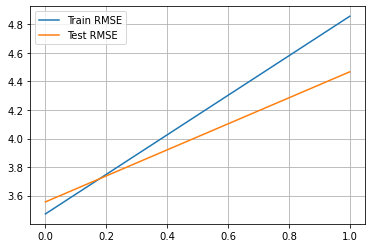

In [37]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-1
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)  #running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()


In summary, VIF is used to identify and address the issue of multicollinearity, while RFE is used to select the most important features for the model. While VIF can be used as a diagnostic tool for feature selection, it is not a feature selection method itself, and its primary goal is to detect and address multicollinearity. Conversely, RFE is a feature selection method that can be used to improve the accuracy of the model by selecting the most important features.

## Feature Elimination Using PCA decomposition

PCA (Principal Component Analysis) decomposition is a technique used in multivariate analysis to reduce the dimensionality of a dataset. It is a mathematical method that transforms a dataset of possibly correlated variables into a new set of uncorrelated variables called principal components.The PCA decomposition is achieved by calculating the eigenvectors and eigenvalues of the correlation matrix of the original variables.PCA is useful in situations where there are many variables in a dataset, as it can help to identify patterns and relationships among the variables and reduce the dimensionality of the data without losing too much information.

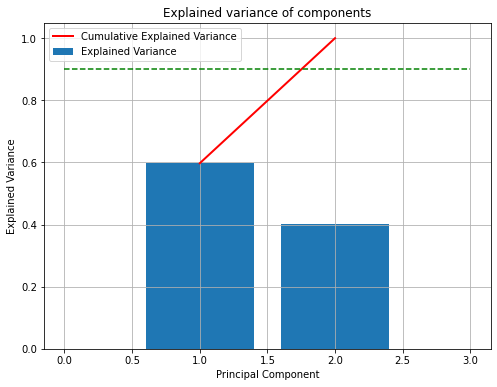

In [38]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

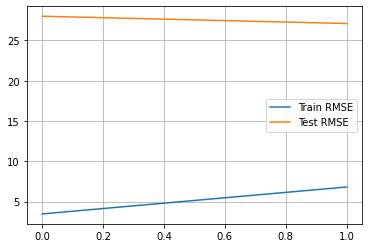

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()

Inference:
It can be seen that the performance of the modelsis quiet comparable upon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping most features using manual RFE Technique. But let us skip these for now, as the advanced ML Algorithms take care of multicollinearity.

In [40]:
# #Shortlisting the selected Features (with RFE)

# lm = LinearRegression()
# rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-8)             # running RFE
# rfe = rfe.fit(Train_X_std, Train_Y)

# LR = LinearRegression()
# LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

# #print(Train_X_std.loc[:,rfe.support_].columns)

# pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
# pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

# print(np.sqrt(mean_squared_error(Train_Y, pred1)))
# print(np.sqrt(mean_squared_error(Test_Y, pred2)))

# Train_X_std = Train_X_std.loc[:,rfe.support_]
# Test_X_std = Test_X_std.loc[:,rfe.support_]

## Predictive Modelling

In [41]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

Objective:
Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## Multiple Linear Regression(MLR)

<<<-----------------------------------Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


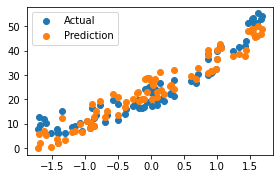



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9404526569528092
Residual Sum of Squares (RSS) on Training set  ---> 964.4065702195882
Mean Squared Error (MSE) on Training set       ---> 12.055082127744853
Root Mean Squared Error (RMSE) on Training set ---> 3.4720429328775375

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9381738467744822
Residual Sum of Squares (RSS) on Training set  ---> 252.92972489462693
Mean Squared Error (MSE) on Training set       ---> 12.646486244731346
Root Mean Squared Error (RMSE) on Training set ---> 3.5561898493656585

--------------------Residual Plots--------------------


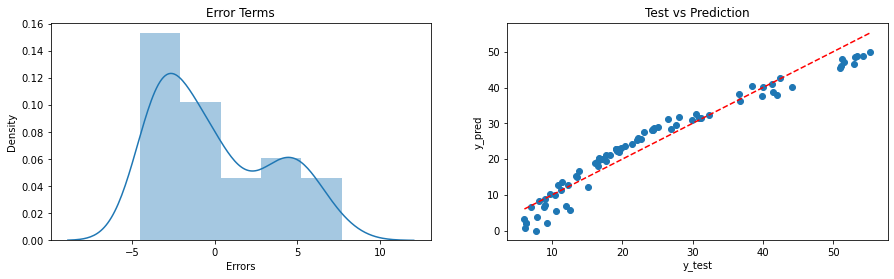

In [43]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}Evaluating Multiple Linear Regression Model {}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

## Ridge Regression model

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


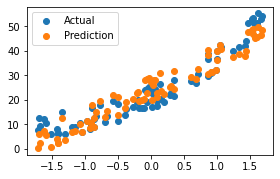



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9403303674178298
Residual Sum of Squares (RSS) on Training set  ---> 966.3871259416084
Mean Squared Error (MSE) on Training set       ---> 12.079839074270105
Root Mean Squared Error (RMSE) on Training set ---> 3.475606288731522

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9395944471864461
Residual Sum of Squares (RSS) on Training set  ---> 247.11807314795328
Mean Squared Error (MSE) on Training set       ---> 12.355903657397665
Root Mean Squared Error (RMSE) on Training set ---> 3.515096535999782

--------------------Residual Plots--------------------


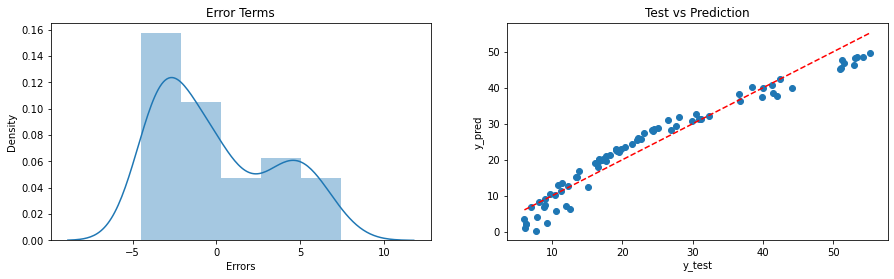

In [51]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

## Lasso Regression Model

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


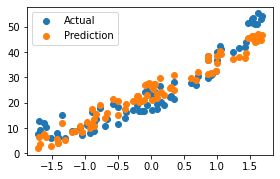



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9321832792587026
Residual Sum of Squares (RSS) on Training set  ---> 1098.334328734415
Mean Squared Error (MSE) on Training set       ---> 13.729179109180189
Root Mean Squared Error (RMSE) on Training set ---> 3.705290691589553

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9415034766890258
Residual Sum of Squares (RSS) on Training set  ---> 239.30826642842504
Mean Squared Error (MSE) on Training set       ---> 11.965413321421252
Root Mean Squared Error (RMSE) on Training set ---> 3.459105855769848

--------------------Residual Plots--------------------


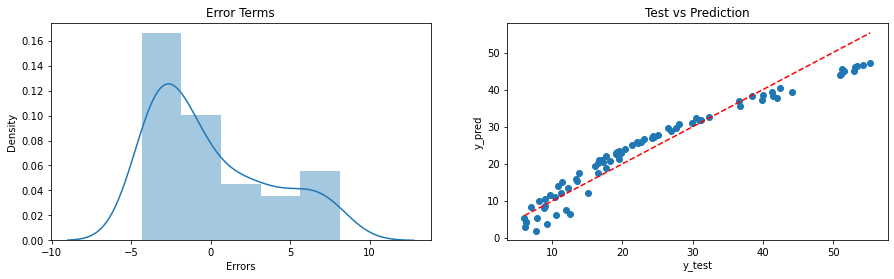

In [44]:
 #Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

## ElasticNet Regression model

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


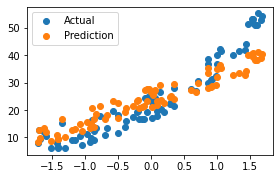



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8308253776159392
Residual Sum of Squares (RSS) on Training set  ---> 2739.889120028556
Mean Squared Error (MSE) on Training set       ---> 34.24861400035695
Root Mean Squared Error (RMSE) on Training set ---> 5.852231540220957

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.857952534622315
Residual Sum of Squares (RSS) on Training set  ---> 581.1137272103185
Mean Squared Error (MSE) on Training set       ---> 29.055686360515928
Root Mean Squared Error (RMSE) on Training set ---> 5.390332676237704

--------------------Residual Plots--------------------


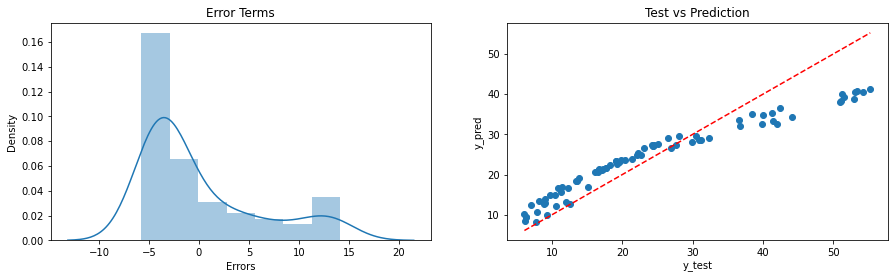

In [45]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

## Polynomial Regression Model

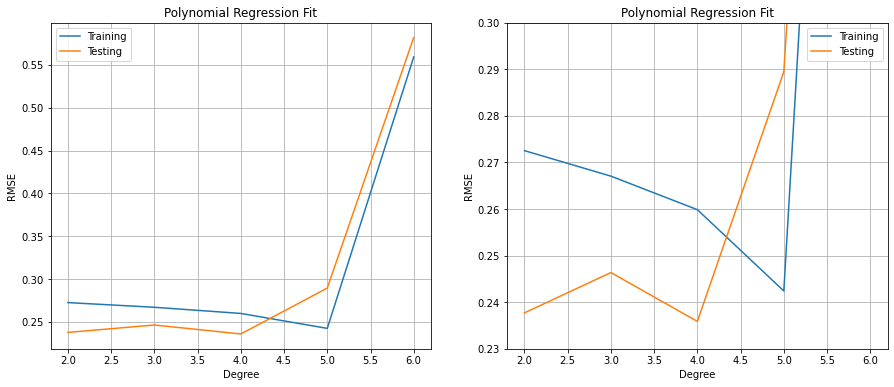

In [46]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=7

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0.23,0.3])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

We can choose 5th order polynomial regression as it gives the optimal training & testing scores...

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


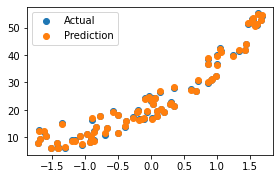



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9997097318617344
Residual Sum of Squares (RSS) on Training set  ---> 4.701074562588273
Mean Squared Error (MSE) on Training set       ---> 0.058763432032353416
Root Mean Squared Error (RMSE) on Training set ---> 0.24241169945436505

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9995903927979447
Residual Sum of Squares (RSS) on Training set  ---> 1.6756959882787543
Mean Squared Error (MSE) on Training set       ---> 0.08378479941393771
Root Mean Squared Error (RMSE) on Training set ---> 0.28945604055527624

--------------------Residual Plots--------------------


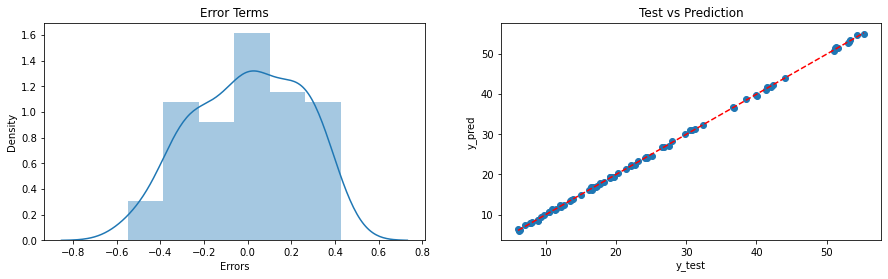

In [47]:
#Using the 5th Order Polynomial Regression model (degree=5)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

In [52]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.940453,0.938174,964.406570,252.929725,12.055082,12.646486,3.472043,3.556190
Ridge Linear Regression (RLR),0.940330,0.939594,966.387126,247.118073,12.079839,12.355904,3.475606,3.515097
Lasso Linear Regression (LLR),0.932183,0.941503,1098.334329,239.308266,13.729179,11.965413,3.705291,3.459106
Elastic-Net Regression (ENR),0.830825,0.857953,2739.889120,581.113727,34.248614,29.055686,5.852232,5.390333
Polynomial Regression (PNR),0.999710,0.999590,4.701075,1.675696,0.058763,0.083785,0.242412,0.289456


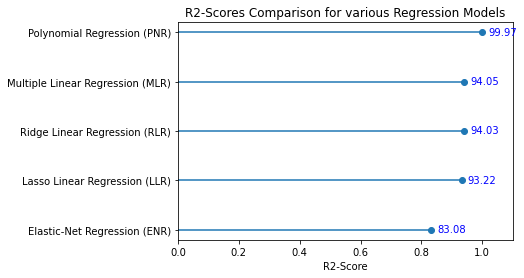

In [53]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

Inference: From the above plot, it is clear that the polynomial regresion models have the highest explainability power to understand the dataset.

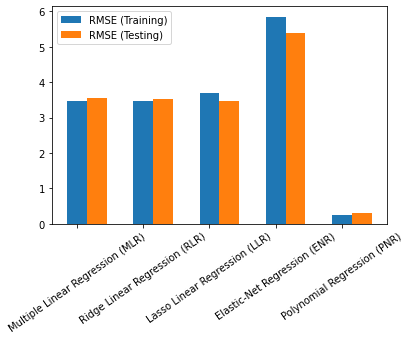

In [54]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
#plt.ylim([0,10])
plt.show()

Inference: Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that polynomial regressions clearly overfitting the current problem. Surprisingly simple MLR Model gave the best results.

## Outcomes of the Project

Here are some of the key outcomes of the project:
--The Dataset was quiet small with just 100 samples & after preprocessing 0% of the datasamples were dropped.
--Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
--The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.
Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
While, Polynomial Regression (Order-5) was the best choise, yet it is safe to use multiple regression algorithm, as their scores were quiet comparable & also they're more generalisable.